# Εργασία 5 – Feature Importance, Dimensionality Reduction, KNN

## 1. Φορτώστε το dataset ασπρόμαυρων χειρόγραφων ψηφίων της MNIST.

**Imports**

In [12]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2. Εμφανίστε σε 1 πλοτ για κάθε ψηφίο (επιλέξτε τα τυχαία από το σύνολο δεδομένων).


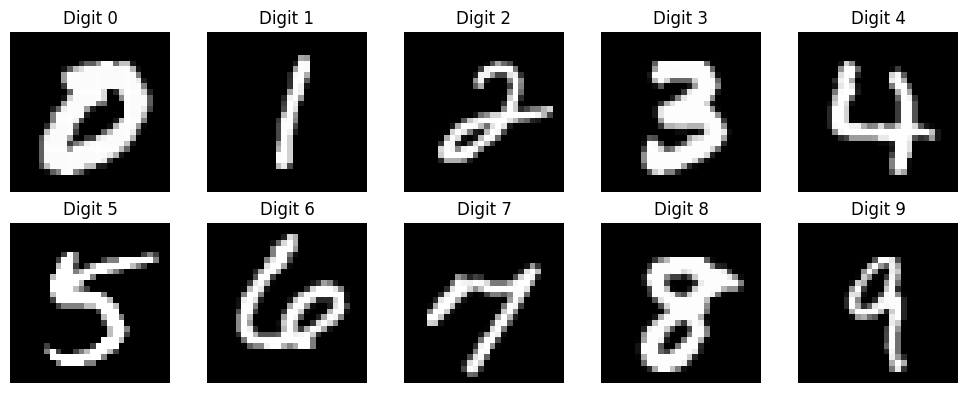

In [3]:
np.random.seed(42)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for digit, ax in enumerate(axes.ravel()):
    digit_indices = np.where(y_train == digit)[0]
    idx = np.random.choice(digit_indices)
    
    ax.imshow(x_train[idx], cmap="gray")
    ax.set_title(f"Digit {digit}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## 3.a. Τι μέγεθος έχει κάθε εικόνα?

In [4]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

Αρα καθε εικονα ειναι $28χ28$ $pixels^2$

## 3.b. Είναι σημαντικά όλα τα pixel της εικόνας ενός ψηφίου? 

Πολλα pixels ειναι παντα μαυρα στο background, ειδικα στις ακρες. Απο την αλλη, αυτα που ειναι κοντα στο κεντρο ειναι συνηθως ασπρα. Οποτε δεν ειναι ολα το ιδιο σημαντικα. Πιο πολυ πληροφορια μας δινουν αυτα που ειναι η περιμετρος του καθε ψηφιου.


## 4. Μετατρέψτε τις εικόνες (x_train, x_test) σε διανύσματα.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten
X_train_flat = x_train.reshape(len(x_train), -1) 
X_test_flat  = x_test.reshape(len(x_test), -1)

print(X_train_flat.shape, X_test_flat.shape)


(60000, 784) (10000, 784)


## 5.a. Εκπαιδεύστε ταξινομητές KNN με k=5,15,51,√N και υπολογίστε την ακρίβεια (accuracy score) στα train,test sets.

In [6]:
ks = [5, 15, 51, int(np.sqrt(X_train_flat.shape[0]))]
models = {}
train_accuracies = []
test_accuracies = []
for k in ks:
    print(f"Train KNN with k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_flat, y_train)

    # predict train and test sets
    y_train_pred = knn.predict(X_train_flat)
    y_test_pred  = knn.predict(X_test_flat)

    # accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"k = {k}, train accuracy = {train_acc:.4f}")
    print(f"k = {k}, test  accuracy = {test_acc:.4f}")

    models[k] = knn


Train KNN with k = 5
k = 5, train accuracy = 0.9819
k = 5, test  accuracy = 0.9688
Train KNN with k = 15
k = 15, train accuracy = 0.9710
k = 15, test  accuracy = 0.9633
Train KNN with k = 51
k = 51, train accuracy = 0.9532
k = 51, test  accuracy = 0.9533
Train KNN with k = 244
k = 244, train accuracy = 0.9211
k = 244, test  accuracy = 0.9241


## 5.b. Δημιουργήστε line plot με οριζόντιο άξονα το k και κάθετο άξονα την ακρίβεια.


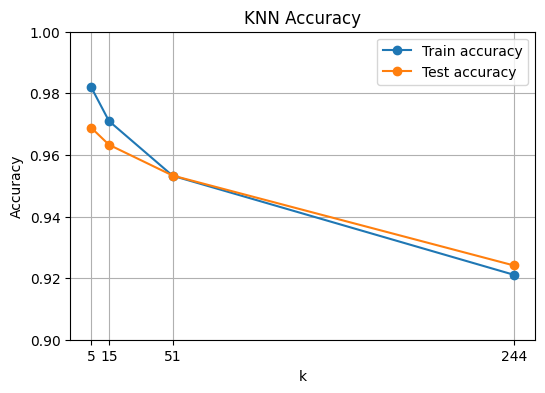

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(ks, train_accuracies, marker='o', label='Train accuracy')
plt.plot(ks, test_accuracies, marker='o', label='Test accuracy')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.xticks(ks)
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.legend()
plt.show()

## 6. Στη συνέχεια, διαιρέστε τα x_train, x_test με το 255 ώστε οι τιμές των pixel να κλιμακωθούν μεταξύ [0, 1] και επαναλάβετε το ερώτημα 5. Συγκρίνεται τα αποτελέσματα σας με το ερώτημα 5.


In [8]:
x_train_norm = X_train_flat.astype("float32") / 255.0
x_test_norm  = X_test_flat.astype("float32") / 255.0

In [9]:
ks = [5, 15, 51, int(np.sqrt(x_train_norm.shape[0]))]
models = {}
train_accuracies = []
test_accuracies = []
for k in ks:
    print(f"Train KNN with k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train_norm, y_train)

    # predict train and test sets
    y_train_pred = knn.predict(x_train_norm)
    y_test_pred  = knn.predict(x_test_norm)

    # accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"k = {k}, train accuracy = {train_acc:.4f}")
    print(f"k = {k}, test  accuracy = {test_acc:.4f}")

    models[k] = knn

Train KNN with k = 5
k = 5, train accuracy = 0.9819
k = 5, test  accuracy = 0.9688
Train KNN with k = 15
k = 15, train accuracy = 0.9710
k = 15, test  accuracy = 0.9633
Train KNN with k = 51
k = 51, train accuracy = 0.9532
k = 51, test  accuracy = 0.9533
Train KNN with k = 244
k = 244, train accuracy = 0.9211
k = 244, test  accuracy = 0.9241


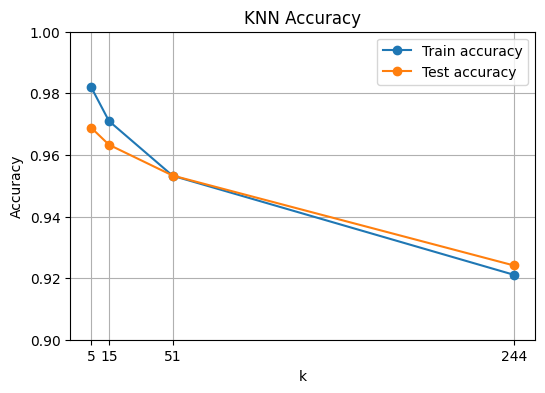

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(ks, train_accuracies, marker='o', label='Train accuracy')
plt.plot(ks, test_accuracies, marker='o', label='Test accuracy')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.xticks(ks)
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.legend()
plt.show()

Αν ολες οι αποστασεις διαιρεθουν με τον ιδιο θετικο αριθμο, απλως αλλαζει η κλιμακα των αποστασεων.
Η σειρα των κοντινοτερων γειτονων δεν αλλαζει, αρα το συνολο των γειτονων που επιλεγονται για καθε δειγμα ειναι το ιδιο και γι αυτο οι προβλεψεις του KNN παραμενουν ιδιες.

## 7. Χρησιμοποιείστε τη ζωγραφική για να σχεδιάσετε ένα ψηφίο της επιλογής σας σε εικόνα 28x28. Συγκεκριμένα, τοποθετήστε μαύρο χρώμα στο φόντο και ζωγραφίστε το ψηφίο με άσπρο. Στη συνέχεια, φορτώστε την εικόνα στο google colab, μετατρέψτε την σε ασπρόμαυρη και ελέγξτε αν ο καλύτερος ταξινομητής του ερωτήματος 6 μπορεί να ταξινομήσει σωστά το ψηφίο.


In [41]:
img = Image.open('1.png')
print(img.mode, img.size)

RGBA (28, 28)


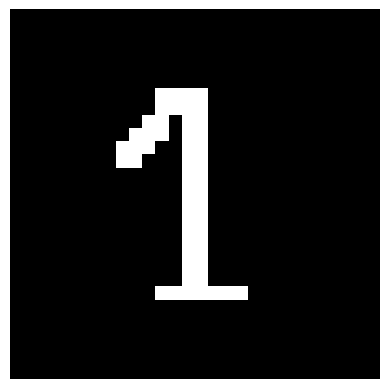

(1, 784)


In [42]:
# grayscale
img_gray = img.convert('L')

import matplotlib.pyplot as plt
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

img_arr = np.array(img_gray)

img_arr = img_arr.astype('float32') / 255.0

# κανουμε flatten και προσθετουμε batch dimension (1, 784)
img_vec = img_arr.reshape(1, -1)
print(img_vec.shape)  # (1, 784)


In [43]:
best_model = models[5]
pred = best_model.predict(img_vec)[0]
print(f"The predicted digit is: {pred}")

The predicted digit is: 1
